In [55]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import re

In [2]:
df = pd.read_csv('./data/smartwatches.csv')

In [3]:
df.head()

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           450 non-null    int64  
 1   Brand                450 non-null    object 
 2   Current Price        440 non-null    float64
 3   Original Price       377 non-null    float64
 4   Discount Percentage  377 non-null    float64
 5   Rating               444 non-null    float64
 6   Number OF Ratings    391 non-null    float64
 7   Model Name           415 non-null    object 
 8   Dial Shape           327 non-null    object 
 9   Strap Color          327 non-null    object 
 10  Strap Material       381 non-null    object 
 11  Touchscreen          413 non-null    object 
 12  Battery Life (Days)  418 non-null    float64
 13  Bluetooth            444 non-null    object 
 14  Display Size         420 non-null    object 
 15  Weight               264 non-null    obj

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.shape

(450, 15)

In [33]:
df["Display Size"].isna().sum()

df["Display Size"].fillna("0.0", inplace=True)

0

In [37]:

df["Display Size"] = df["Display Size"].apply(lambda x: float(x.split(" ")[0]))

AttributeError: 'float' object has no attribute 'split'

In [41]:
df["Display Size"].replace(0.0, np.nan, inplace=True)

In [42]:
df["Weight"].isna().sum()

df["Weight"].fillna("0.0", inplace=True)

C:\Users\MN\AppData\Local\Temp\ipykernel_14476\2211835046.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Weight"].fillna("0.0", inplace=True)


In [53]:
df["Weight"].value_counts()

Weight
20 - 35 g    80
75g +        66
35 - 50 g    58
<= 20 g      43
50 - 75 g    17
Name: count, dtype: int64

In [59]:
cal = sum([int(x) for x in re.findall(r'\d+', '20 - 35 g')])/2
df["Weight"].replace('20 - 35 g', cal, inplace=True)

In [61]:
cal = sum([int(x) for x in re.findall(r'\d+', '35 - 50 g')])/2
df["Weight"].replace('35 - 50 g', cal, inplace=True)

In [62]:
cal = sum([int(x) for x in re.findall(r'\d+', '50 - 75 g')])/2
df["Weight"].replace('50 - 75 g', cal, inplace=True)

In [93]:
df["Weight"].replace('75g +', float(re.findall(r'\d+', '75g +')[0]), inplace=True)

C:\Users\MN\AppData\Local\Temp\ipykernel_14476\279522273.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Weight"].replace('75g +', float(re.findall(r'\d+', '75g +')[0]), inplace=True)


In [67]:
df["Weight"].replace('<= 20 g', float(re.findall(r'\d+', '<= 20 g')[0]), inplace=True)

In [95]:
train_df = df.sample(frac=0.8, random_state=48)
train_df

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
422,fire-boltt,3449.0,9999.0,65.506551,3.8,83.0,ring,Square,Black,Rubber,Yes,22.0,Yes,0.1,75.0
414,fire-boltt,3927.0,9999.0,60.726073,2.5,NaN,RING 3,Square,Gold,Silicon,Yes,22.0,Yes,1.8,NaN
263,garmin,44990.0,50490.0,10.893246,4.0,6.0,"Instinct 2 Solar, Rugged Outdoor SmartWatch, M...",Circle,Blue,Silicon,No,17.5,Yes,0.9,NaN
259,garmin,67490.0,NaN,NaN,4.7,NaN,"Forerunner 955 Solar charging upto 20 days, HR...",Circle,White,Silicon,No,8.0,Yes,1.3,75.0
317,fossil,10998.0,21995.0,49.997727,3.9,5182.0,4th Gen Explorist HR,Circle,Black,Silicon,Yes,22.0,Yes,1.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,fire-boltt,2499.0,9999.0,75.007501,4.1,2571.0,BSW072,NaN,NaN,NaN,Yes,8.0,Yes,2.0,75.0
355,ambrane,1499.0,5299.0,71.711644,4.2,8574.0,"Wise Eon Pro1.85"" lucid display with BT calling",Square,Red,Silicon,Yes,22.0,Yes,1.9,NaN
35,boat,1199.0,6990.0,82.846924,4.0,27771.0,Watch Flash,NaN,NaN,Silicon,Yes,8.0,Yes,1.3,62.5
185,honor,13999.0,15999.0,12.500781,4.4,14613.0,Magic Watch 2 (46 mm),Circle,Brown,Leather,Yes,8.0,Yes,1.8,27.5


In [30]:
test_df = df.drop(train_df.index)
test_df

,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
6,noise,1999.0,4999.0,60.012002,4.1,1018.0,NaN,NaN,NaN,NaN,NaN,NaN,Yes,1.4 inches,35 - 50 g
12,noise,3799.0,7999.0,52.506563,3.8,545.0,Wrb-sw-colorfitpro4alpha-std-blk_blk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,fire-boltt,4599.0,17999.0,74.448580,2.5,11.0,HULK BLUETOOTH CALLING,Square,Black,Silicon,Yes,22.0,Yes,1.8 inches,NaN
420,fire-boltt,2699.0,4999.0,46.009202,2.5,33.0,NINJA PRO,Square,Black,Silicon,Yes,22.0,Yes,1.3 inches,NaN
425,fire-boltt,3999.0,9999.0,60.006001,3.7,NaN,bsw360,Circle,Blue,Rubber,Yes,22.0,Yes,0.1 inches,NaN
432,fire-boltt,3699.0,11999.0,69.172431,2.5,NaN,starcross,Square,Black,Silicon,Yes,8.0,Yes,1.8 inches,NaN


In [10]:
print(test_df.shape, train_df.shape)

(90, 15) (360, 15)


In [11]:
test_df = test_df.reset_index()
train_df = train_df.reset_index()

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                90 non-null     int64  
 1   Brand                90 non-null     object 
 2   Current Price        86 non-null     float64
 3   Original Price       75 non-null     float64
 4   Discount Percentage  75 non-null     float64
 5   Rating               89 non-null     float64
 6   Number OF Ratings    80 non-null     float64
 7   Model Name           78 non-null     object 
 8   Dial Shape           57 non-null     object 
 9   Strap Color          57 non-null     object 
 10  Strap Material       70 non-null     object 
 11  Touchscreen          76 non-null     object 
 12  Battery Life (Days)  82 non-null     float64
 13  Bluetooth            88 non-null     object 
 14  Display Size         76 non-null     object 
 15  Weight               55 non-null     objec

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                360 non-null    int64  
 1   Brand                360 non-null    object 
 2   Current Price        354 non-null    float64
 3   Original Price       302 non-null    float64
 4   Discount Percentage  302 non-null    float64
 5   Rating               355 non-null    float64
 6   Number OF Ratings    311 non-null    float64
 7   Model Name           337 non-null    object 
 8   Dial Shape           270 non-null    object 
 9   Strap Color          270 non-null    object 
 10  Strap Material       311 non-null    object 
 11  Touchscreen          337 non-null    object 
 12  Battery Life (Days)  336 non-null    float64
 13  Bluetooth            356 non-null    object 
 14  Display Size         344 non-null    object 
 15  Weight               209 non-null    obj

In [14]:
train_df.dtypes

index                    int64
Brand                   object
Current Price          float64
Original Price         float64
Discount Percentage    float64
Rating                 float64
Number OF Ratings      float64
Model Name              object
Dial Shape              object
Strap Color             object
Strap Material          object
Touchscreen             object
Battery Life (Days)    float64
Bluetooth               object
Display Size            object
Weight                  object
dtype: object

In [15]:
numerical_col = [x for x in train_df.columns if train_df[x].dtypes != 'object']
continous_cols = [x for x in train_df.columns if train_df[x].dtype == 'object']

In [16]:
numerical_data = train_df[numerical_col]
numerical_data.drop(columns=['index'], inplace=True)
numerical_data.head()


C:\Users\MN\AppData\Local\Temp\ipykernel_14476\2447889260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data.drop(columns=['index'], inplace=True)


,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
0,3449.0,9999.0,65.506551,3.8,83.0,22.0
1,3927.0,9999.0,60.726073,2.5,NaN,22.0
2,44990.0,50490.0,10.893246,4.0,6.0,17.5
3,67490.0,NaN,NaN,4.7,NaN,8.0
4,10998.0,21995.0,49.997727,3.9,5182.0,22.0


In [17]:
continuos_data = train_df[continous_cols]
continuos_data.head()

,Brand,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Bluetooth,Display Size,Weight
0,fire-boltt,ring,Square,Black,Rubber,Yes,Yes,0.1 inches,75g +
1,fire-boltt,RING 3,Square,Gold,Silicon,Yes,Yes,1.8 inches,NaN
2,garmin,"Instinct 2 Solar, Rugged Outdoor SmartWatch, M...",Circle,Blue,Silicon,No,Yes,0.9 inches,NaN
3,garmin,"Forerunner 955 Solar charging upto 20 days, HR...",Circle,White,Silicon,No,Yes,1.3 inches,75g +
4,fossil,4th Gen Explorist HR,Circle,Black,Silicon,Yes,Yes,1.8 inches,NaN


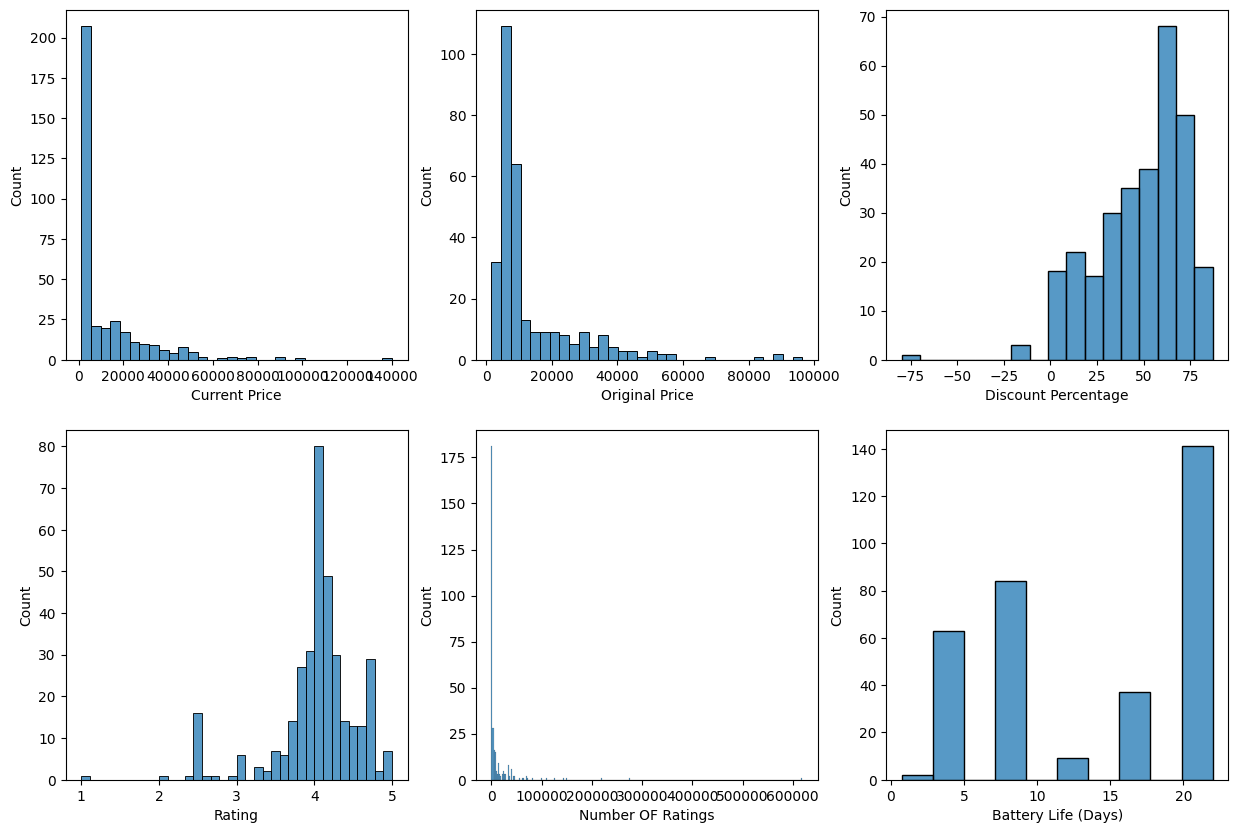

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

for i, column in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data = train_df[column], ax=ax)

plt.show()

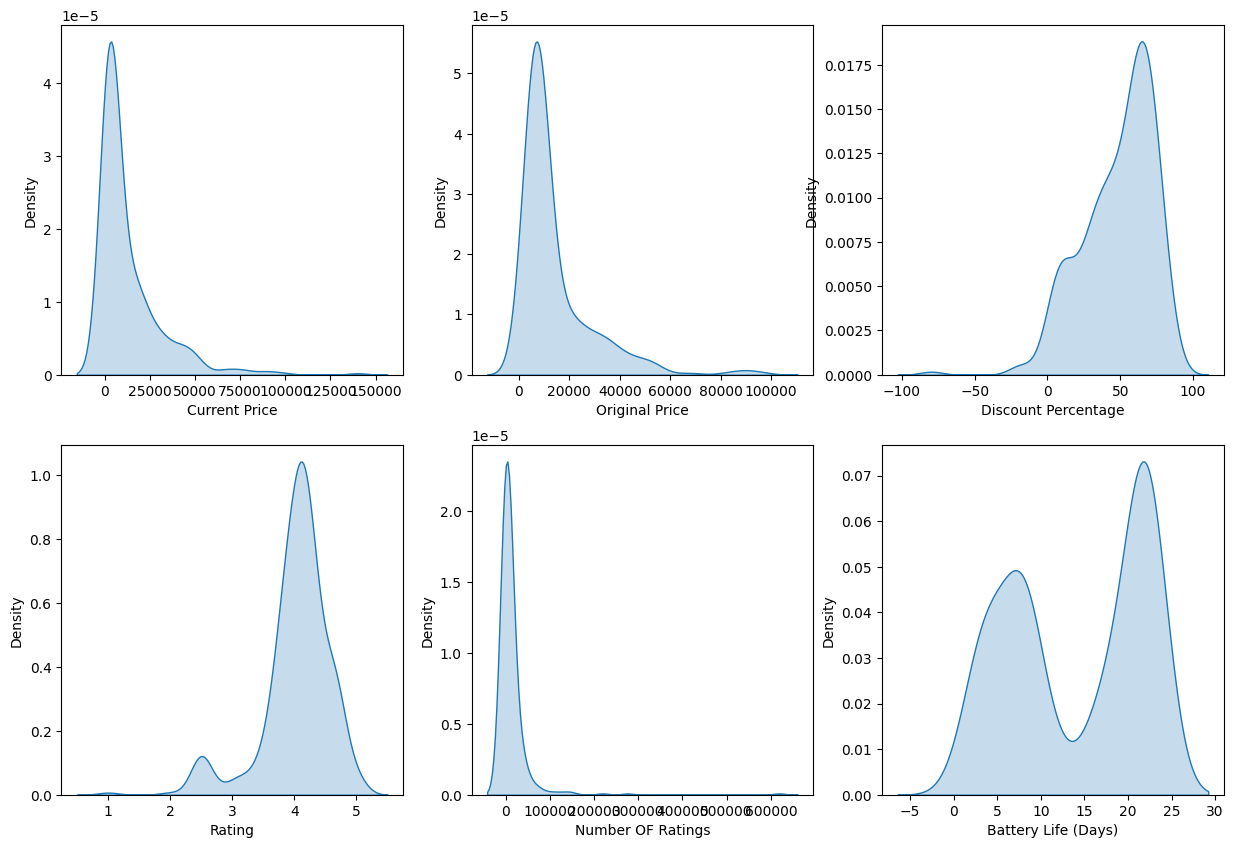

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

for i, column in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.kdeplot(data = train_df[column], ax=ax, fill=True)

plt.show()

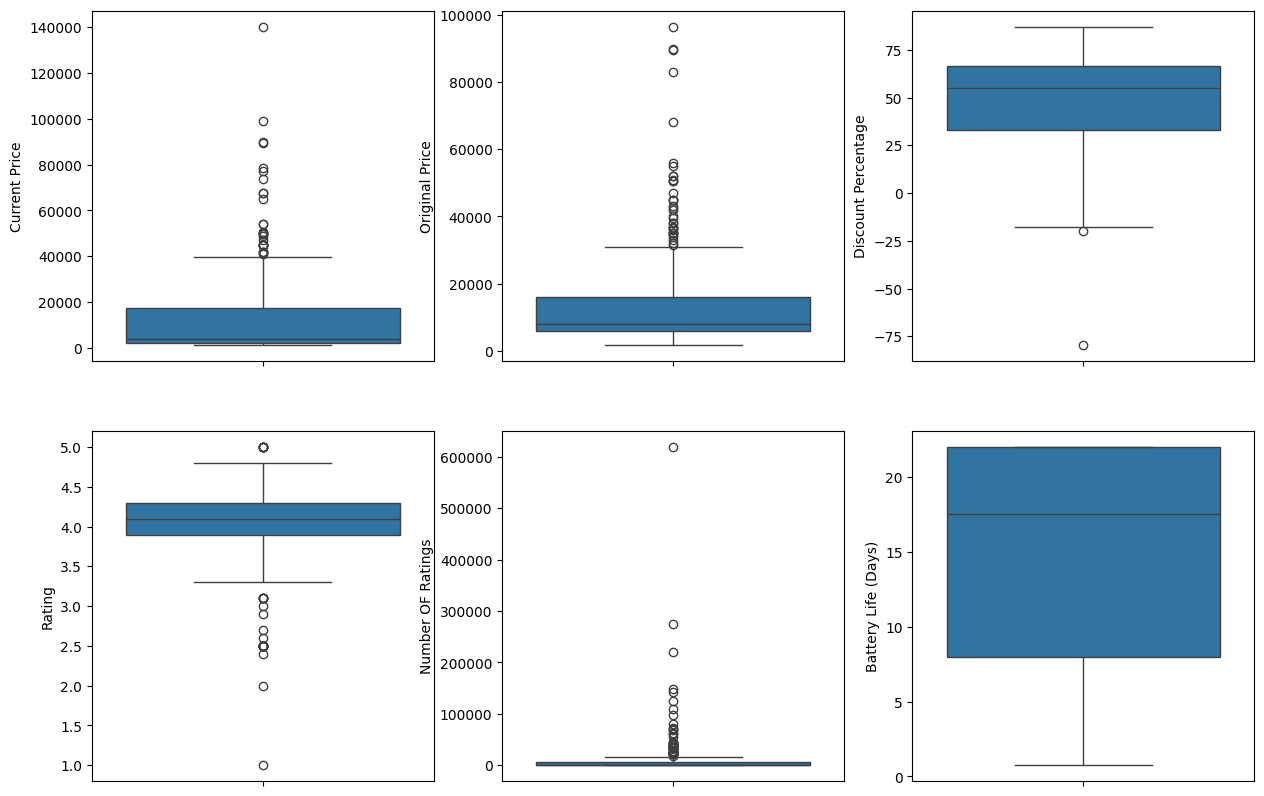

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

for i, column in enumerate(numerical_data):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(data = train_df[column], ax=ax)

plt.show()

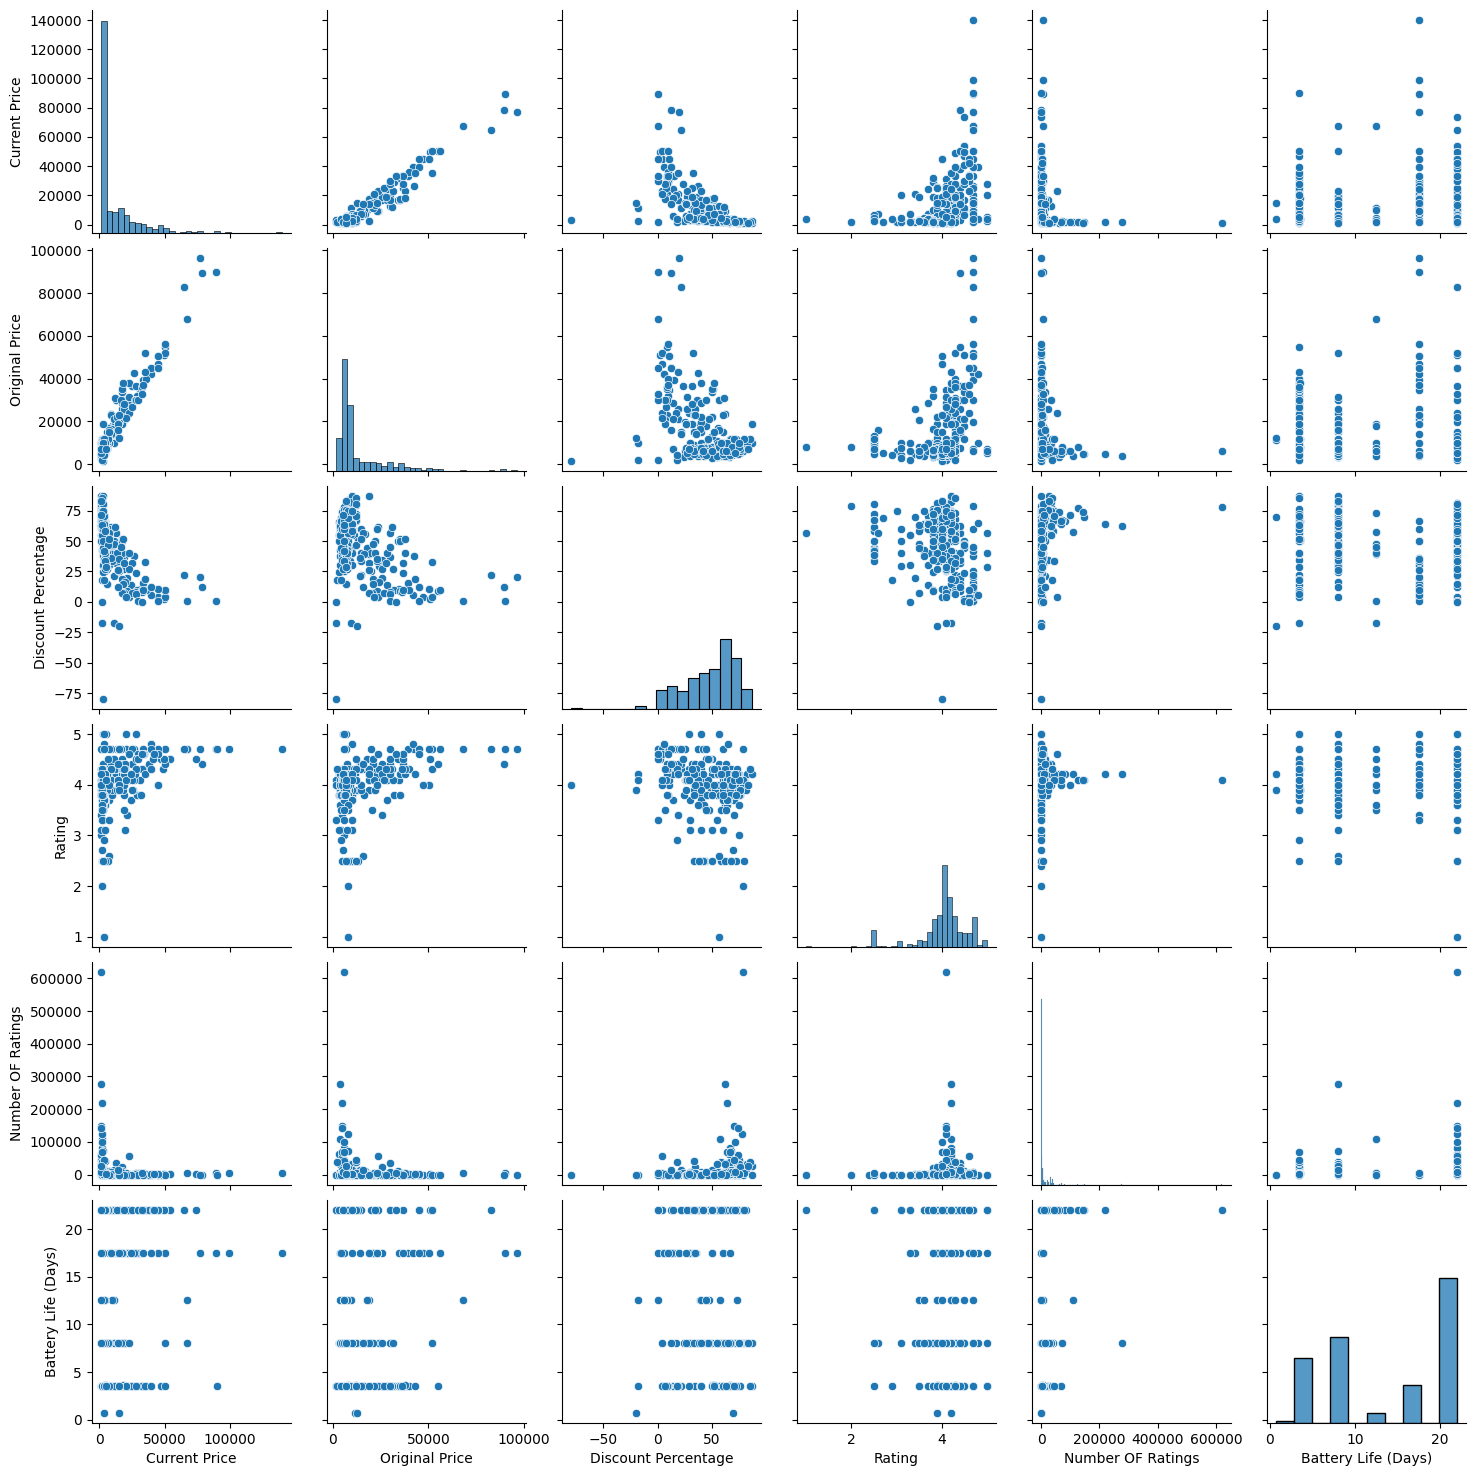

In [21]:
sns.pairplot(data= numerical_data)


<Axes: >

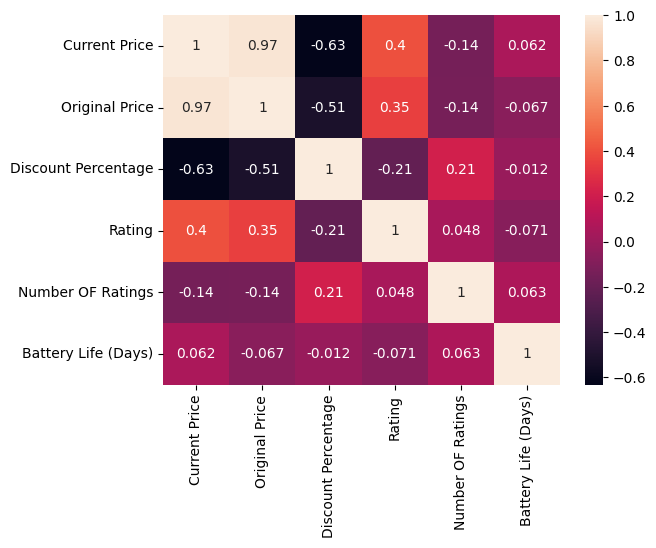

In [22]:
sns.heatmap(data=numerical_data.corr(), annot=True)